<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/LeNet_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@siddheshb008/lenet-5-architecture-explained-3b559cb2d52b

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to fit the LeNet architecture (input shape: 28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define LeNet-5 architecture
model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/10
469/469 [==============================] - 7s 5ms/step - loss: 0.4113 - accuracy: 0.8777 - val_loss: 0.1471 - val_accuracy: 0.9555
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1211 - accuracy: 0.9629 - val_loss: 0.0873 - val_accuracy: 0.9729
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9744 - val_loss: 0.0642 - val_accuracy: 0.9797
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 0.0519 - val_accuracy: 0.9831
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0474 - val_accuracy: 0.9854
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0445 - val_accuracy: 0.9861
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0420 - accuracy: 0.9865 - val_loss: 0.0404 - val_accuracy: 0.9875
Epoch 

In [11]:
import numpy as np

# Select a random sample from the test set
index = np.random.randint(0, len(x_test))
sample = x_test[index].reshape(1, 28, 28, 1)

# Perform prediction
prediction = model.predict(sample)
predicted_label = np.argmax(prediction)

print("Predicted Label:", predicted_label)
print("Actual Label:", y_test[index])


1/1 [==============================] - 0s 327ms/step
Predicted Label: 8
Actual Label: 8


1/1 [==============================] - 0s 79ms/step


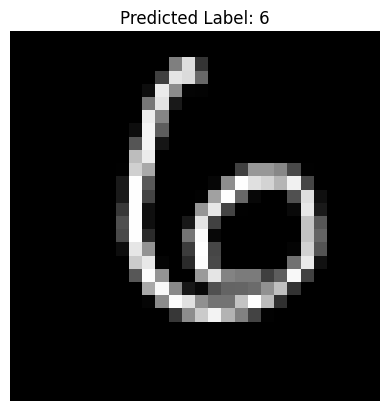

In [12]:
import matplotlib.pyplot as plt

# Specify the index of the image
index = 100

# Select the image from the test set
image = x_test[index]
image = image.reshape(1, 28, 28, 1)

# Perform prediction
prediction = model.predict(image)
predicted_label = np.argmax(prediction)

# Plot the image
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()


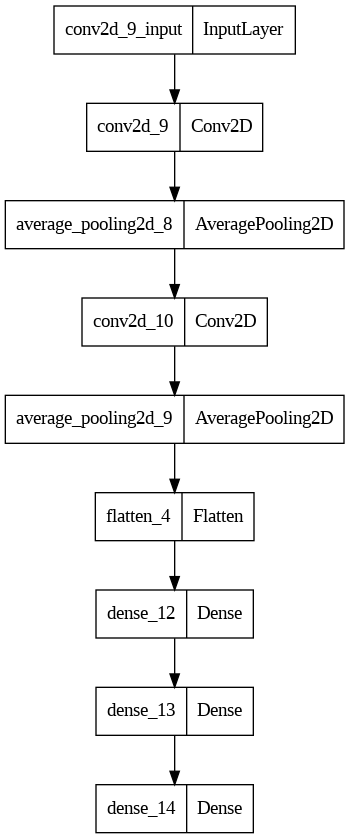

In [13]:
from keras.utils import plot_model
plot_model(model)